In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/btc_dataset.csv")


**Close BTC Price Outlier Detection using Rolling Statistics**

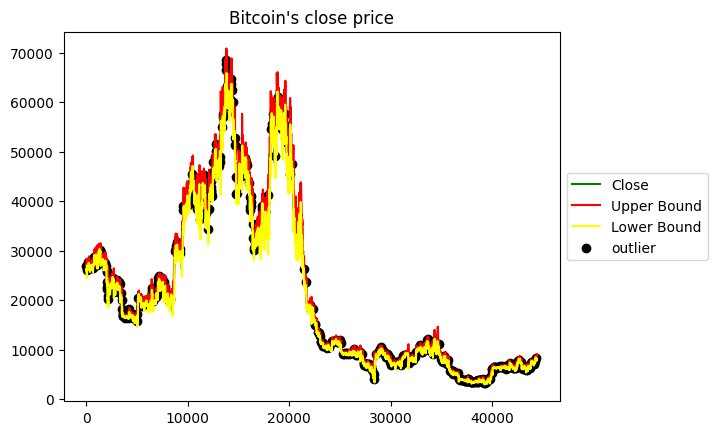

In [ ]:
# Calculate the rolling mean and standard deviation with a window of 21
df_rolling = data[["close"]].rolling(window=21).agg(["mean", "std"])

# Drop the top level of the multi-index created by the aggregation
df_rolling.columns = df_rolling.columns.droplevel()

# Join the rolling stats back to the original dataframe
data = data.join(df_rolling)

# Define the number of standard deviations for outlier detection
N_SIGMAS = 3

# Calculate the upper and lower bounds for outlier detection
data["upper"] = data["mean"] + N_SIGMAS * data["std"]
data["lower"] = data["mean"] - N_SIGMAS * data["std"]

# Create a boolean series that is True where the return is an outlier
data["outlier"] = (data["close"] > data["upper"]) | (data["close"] < data["lower"])

# Create a plot of the returns, the upper and lower bounds, and the outliers
fig, ax = plt.subplots()

# Plot the closing prices, upper bounds, and lower bounds with specified colors
ax.plot(data.index, data["close"], color="green", label="Close")
ax.plot(data.index, data["upper"], color="red", label="Upper Bound")
ax.plot(data.index, data["lower"], color="yellow", label="Lower Bound")

# Add the outliers to the plot
ax.scatter(data.loc[data["outlier"]].index,
           data.loc[data["outlier"], "close"],
           color="black", label="outlier")

# Set the title and legend of the plot
ax.set_title("Bitcoin's close price")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


**Detecting outliers using PCA**

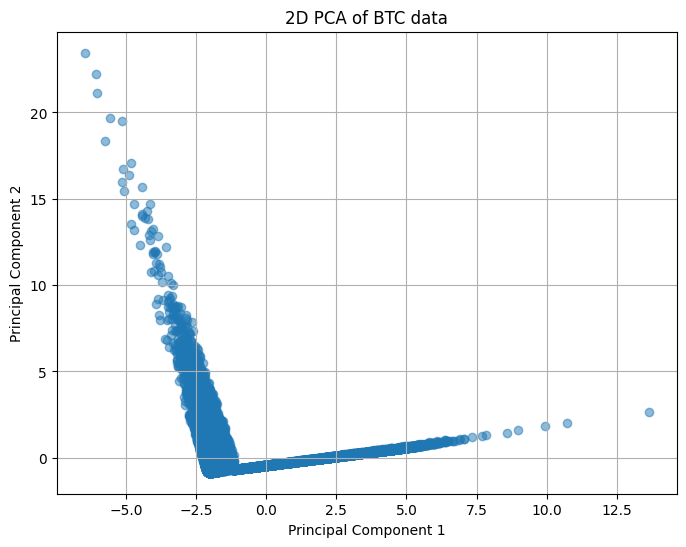

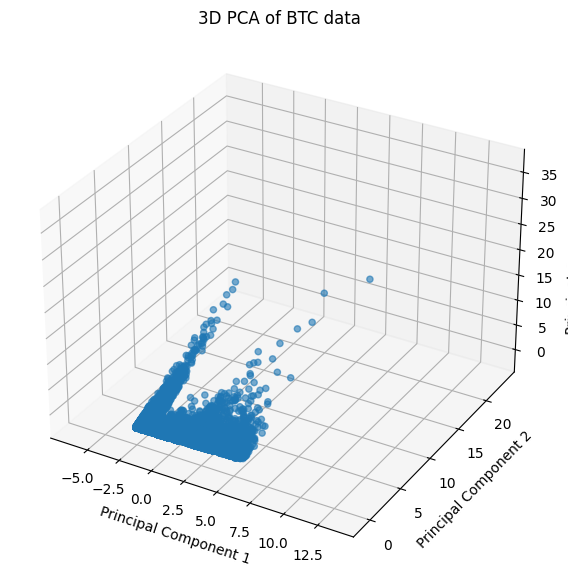

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select numerical columns
numerical_cols = ['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']

# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols])

# Apply PCA for 2 components
pca_2d = PCA(n_components=2)
principalComponents_2d = pca_2d.fit_transform(scaled_data)

# Plotting the 2D PCA
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents_2d[:, 0], principalComponents_2d[:, 1], alpha=0.5)
plt.title('2D PCA of BTC data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Apply PCA for 3 components
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(scaled_data)

# Plotting the 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalComponents_3d[:, 0], principalComponents_3d[:, 1], principalComponents_3d[:, 2], alpha=0.6)
ax.set_title('3D PCA of BTC data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()




**TSNE - CLUSTERING**

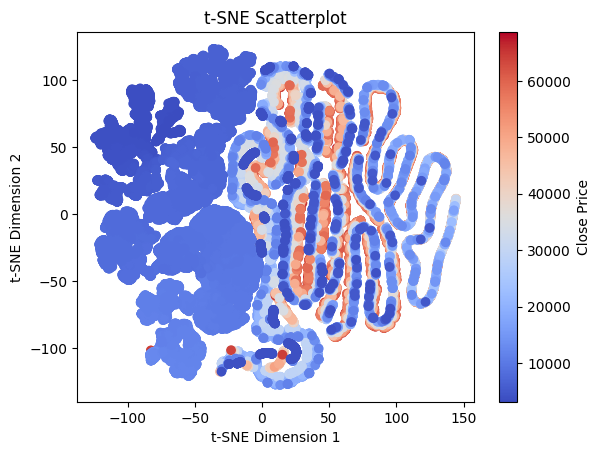

In [36]:
from sklearn.manifold import TSNE

features = ['open', 'high', 'low', 'Volume USD']
X = data[features]
y = data['close']

tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_tsne = tsne.fit_transform(X)

# Create a scatterplot of the t-SNE representation
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Scatterplot')
plt.colorbar(label='Close Price')
plt.show()
